         posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   
2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   
3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   
4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   

                                               title  label_group  
0                          Paper Bag Victoria Secret    249114794  
1  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045  
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891  
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188  
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069  
Total postings: 34250
Unique products (label_group): 11014


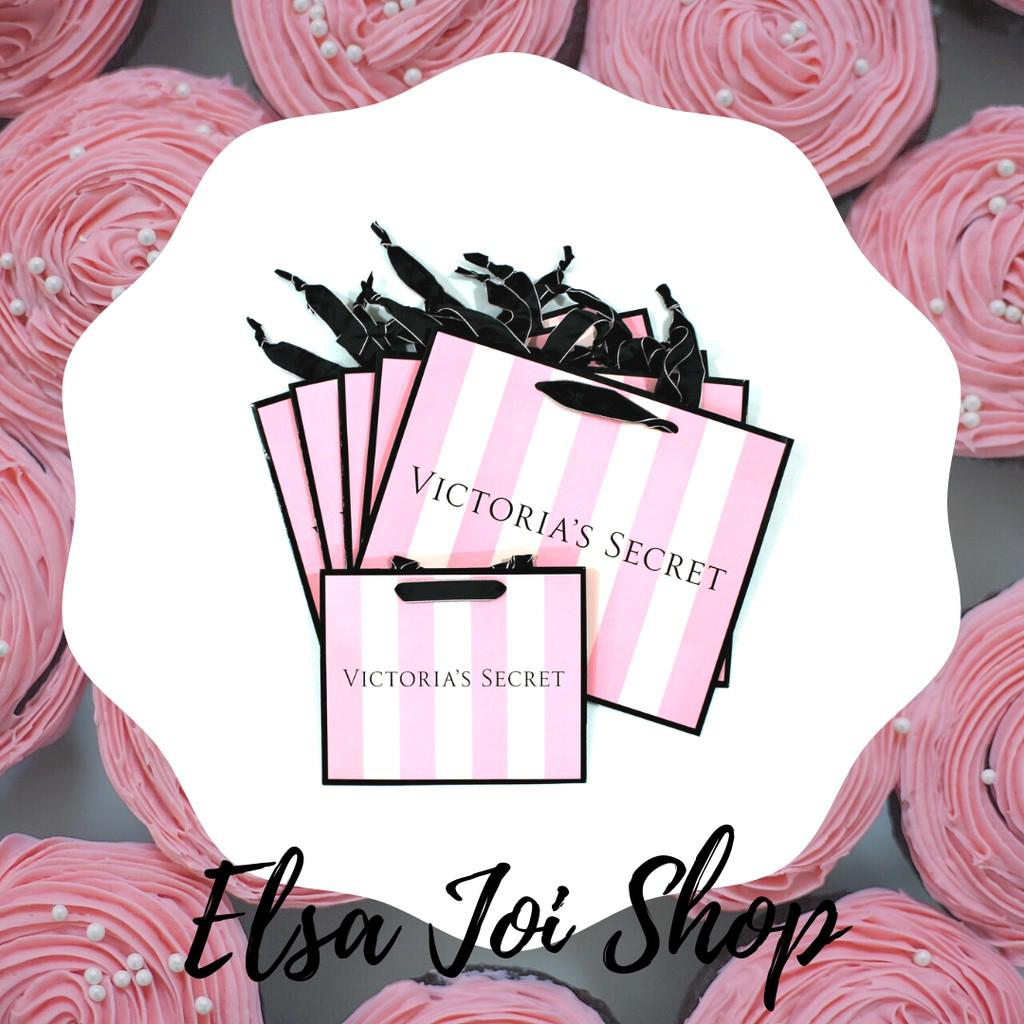

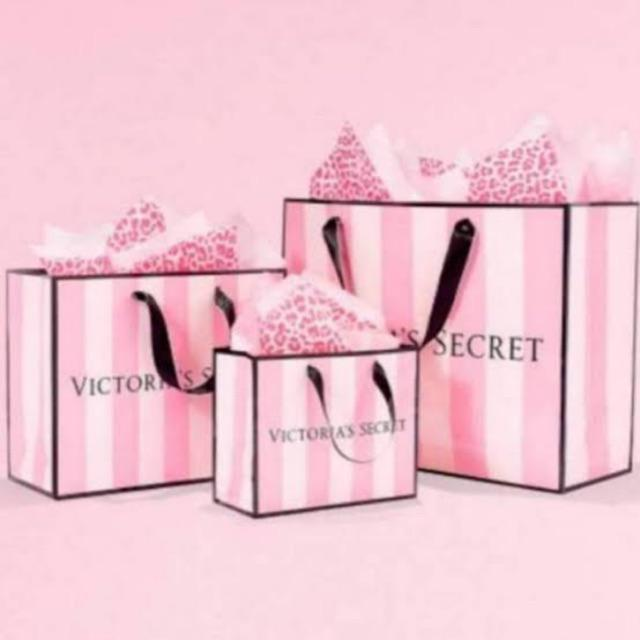

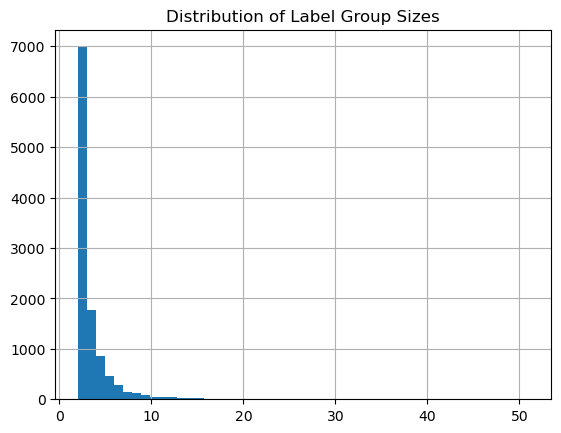

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

#Load metadata

data_dir = r'C:\Users\Matthew\Documents\PhD\shopee-product-matching\data\train.csv'
data_dir_imgs = r'C:\Users\Matthew\Documents\PhD\shopee-product-matching\data\train_images'

df = pd.read_csv(data_dir)
print(df.head())

#Dataset size
print(f"Total postings: {len(df)}")
print(f"Unique products (label_group): {df['label_group'].nunique()}")

# Display some images from the same group
sample_group = df['label_group'].iloc[0]
sample_images = df[df['label_group'] == sample_group]['image'].values

for img_id in sample_images[:3]:
    img_path = os.path.join(data_dir_imgs, img_id)
    display(Image.open(img_path))

Images with multiple labels: 46
Titles with multiple labels: 73
Ambiguous samples: 299
Clean samples: 33951


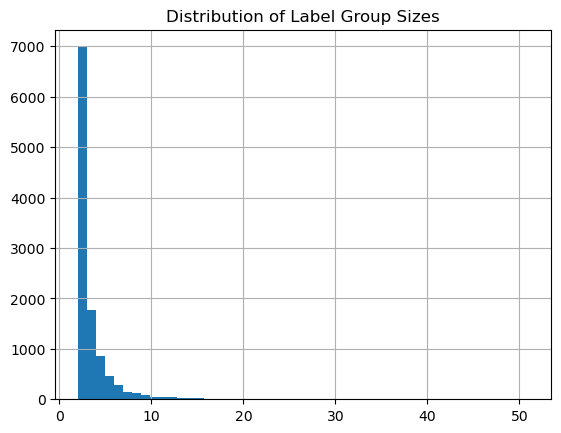

In [8]:
# Label distribution
df['label_group'].value_counts().hist(bins=50)
plt.title('Distribution of Label Group Sizes')
plt.ylabel

sameimg_difflabels = {}

# Same image, different labels
image_label_counts = df.groupby('image')['label_group'].nunique()
print(f"Images with multiple labels: {(image_label_counts > 1).sum()}")

# Same title, different labels
title_label_counts = df.groupby('title')['label_group'].nunique()
print(f"Titles with multiple labels: {(title_label_counts > 1).sum()}")

# Find images linked to multiple labels
ambiguous_images = df.groupby('image')['label_group'].nunique()
ambiguous_images = ambiguous_images[ambiguous_images > 1].index

# Find titles linked to multiple labels
ambiguous_titles = df.groupby('title')['label_group'].nunique()
ambiguous_titles = ambiguous_titles[ambiguous_titles > 1].index

# Flag ambiguous samples
df['ambiguous'] = df['image'].isin(ambiguous_images) | df['title'].isin(ambiguous_titles)

# Separate ambiguous and clean data
df_ambiguous = df[df['ambiguous']]
df_clean = df[~df['ambiguous']]

print(f"Ambiguous samples: {len(df_ambiguous)}")
print(f"Clean samples: {len(df_clean)}")



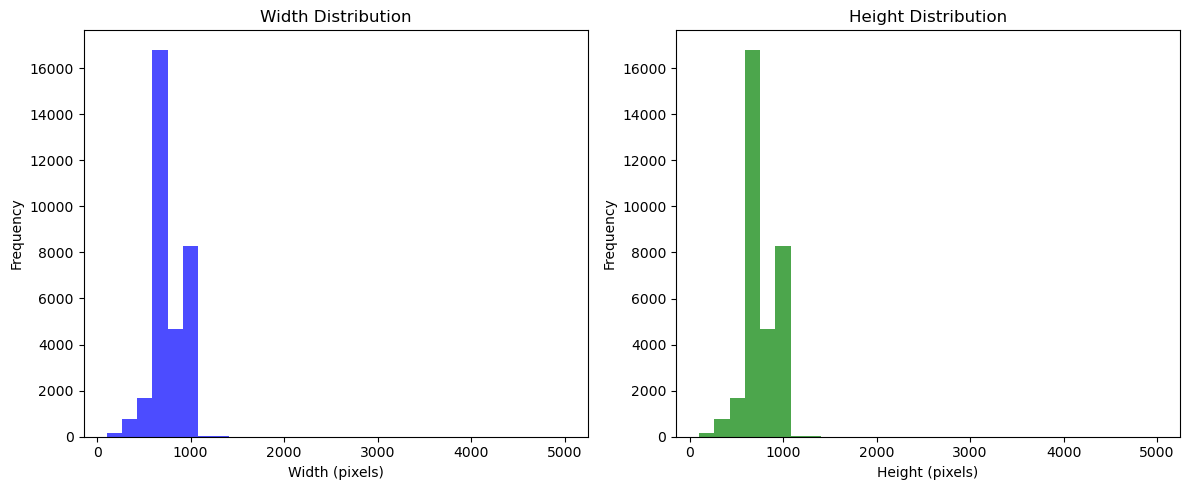

Lowest width: 100 Highest width 5000 Median width 700.0 Mean width 752.5918795507837
Lowest height: 100 Highest height 5000 Median height 700.0 Mean height 752.6030174009626


In [11]:
# Plot image sizes

import matplotlib.pyplot as plt

# Histogram for widths and heights
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, color='blue', alpha=0.7)
plt.title('Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=30, color='green', alpha=0.7)
plt.title('Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f'Lowest width:',np.min(widths),'Highest width', np.max(widths), 'Median width', np.median(widths), 'Mean width', np.mean(widths))
print(f'Lowest height:',np.min(heights),'Highest height', np.max(heights), 'Median height', np.median(heights), 'Mean height', np.mean(heights))

In [ ]:
# Resize all images to 224 x 224

data_dir_imgs_train = r'C:\Users\Matthew\Documents\PhD\shopee-product-matching\data\train_images'
data_dir_imgs_test = r'C:\Users\Matthew\Documents\PhD\shopee-product-matching\data\test_images'

for root, dirs, files in os.walk(data_dir_imgs_train):
    for file in files:
        image = Image.open(os.path.join(root,file))
        resized_img = image.resize((224, 224), resample=Image.LANCZOS)
        resized_img.save(os.path.join(root,file))

for root, dirs, files in os.walk(data_dir_imgs_test):
    for file in files:
        image = Image.open(os.path.join(root,file))
        resized_img = image.resize((224, 224), resample=Image.LANCZOS)
        resized_img.save(os.path.join(root,file))

